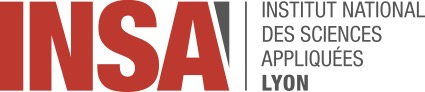
# P2I7: Chapitre 7 méthodes numériques
## Schémas aux différences finies pour les problèmes paraboliques (1D)
Camille Carvalho (INSA/ICJ)

In [5]:
#libraries to import
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import sympy as sp

## Section 7.3 : Application en thermique

On cherche maintenant à connaître la température $T(t,x)$ dans une poutre de température initiale $T^0 = 30^{\circ}C$, qui reste à température $T^0$ sur l'extremité gauche, et soumise à une source de chaleur $f(x)$ :

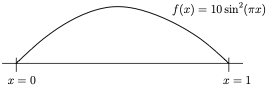

On résout l'équation de la chaleur dans la poutre pour $0 < x < 1$m et pour $0 \le t \le 1\mbox{s}$ :
$$ \frac{\partial T}{\partial t} - D \frac{\partial^2 T}{\partial x^2} = f(x), $$
avec les conditions aux limites 
$$ T(t,0) = 30^{\circ}C, \quad \frac{\partial T}{\partial x}(t, 1) = 10^{\circ}\mbox{C/m}, $$
et la condition initiale
$$ T(0,x) = 30^{\circ}\mbox{C}. $$
Le coefficient de diffusivité est pris égal à $D = 1~\mbox{m}^2/\mbox{s}$. 

**Question 1.** Appliquer le schéma d'Euler explicite à ce problème.

In [6]:
# On fait appel aux codes créés prédemment
from numpy import linalg as la
def difference_finies_theta_schema(D, T0, T1, L, f, M, a, b, N, U0, θ):
    '''
    function that approximates the PDE du/dt -D *d2/dx2 = f, u(t,0) = T0, du/dx(t,1) = T1
    a < t < b, using a θ-schema
    
    Parameters
    ==========
    D: float number, diffusion parameter
    T0: float number, boundary parameter 
    T1: float number,  boundary parameter
    L: float number, upper bound space interval
    M: integer, number of space subintervals
    a: float number, lower bound time interval
    b: float number, upper bound time interval
    N: integer, number of time subintervals
    U0: float number, initial condition
    θ: float number, type of θ schema
    
    Returns
    =======
    The sampled time t, as an array of values
    The sampled space x, as an array of values
    The solution u, as a matrix of values
    '''    
    
    #discretization of space and time
    dx = L/(M-1)
    x = [i * dx for i in range(M)]
    Δt = (b-a)/ (N-1)
    t = [a + i * Δt for i in range(N)]
    
    #Step 1: create spatial discretization of the system leading to u'= B-Au
    F = [f(p) for p in x]
    A = np.zeros((M,M))
    B = np.zeros((M,1))
    for i in range (1, M-1): 
        A[i,i]=2/dx**2;
        A[i,i-1]=-1/dx**2;
        A[i,i+1]=-1/dx**2;
        B[i] = F[i]
    A[0,0] = 1
    A[M-1,M-2] = -2/dx**2
    A[M-1,M-1] = 2/dx**2
    A = A*D
    B[0] = T0
    B[M-1] = F[M-1]+ 2*T1/dx
    
    #Step 2: time discretization of the system via a θ-scheme
    u = np.zeros((M, N))
    u[:, 0:1] = U0*np.ones((M,1))
    C = np.eye(M) + Δt * θ * A
    E = np.eye(M) - Δt * (1. - θ) * A
    inv_C = la.inv(C)
    for i in range(1, N+1):
        u[:, i:i+1] = inv_C@(Δt*B + E@u[:, i-1:i])
    return x, t, u

In [11]:
# Paramètres
D = 1
T0 = 30
T1 = 30
f = lambda x: 10*(np.sin(np.pi*x))**2
L = 1
U0 = 30
a = 0
b = 10
M = 20
N = 100
T = 10
θ = 0.5
x, t, u = difference_finies_theta_schema(D, T0, T1, L, f, M, a, b, N, U0, θ)

Petit code pour animer la solution au cours de temps 

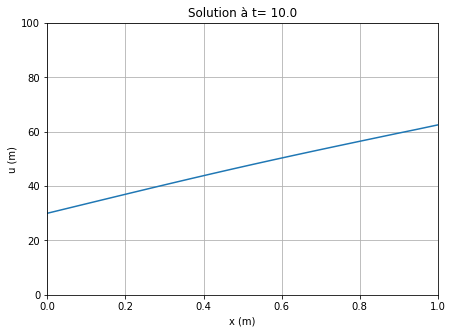

In [12]:
from IPython.display import clear_output

def live_plot(x, u, i, figsize=(7,5)):
    clear_output(wait=True)
    
    plt.figure(figsize=figsize)    
    plt.xlim(0, L)
    plt.plot(x, u[:,i:i+1])
    plt.title(f'Solution à t= {t[i]}')
    plt.grid(True)
    plt.ylim(0, 100)
    plt.xlabel('x (m)')
    plt.ylabel('u (m)')
    plt.show()  
    
for i in range(0, N):
    live_plot(x, u, i)

**Question 2.** Ecrire un programme Python qui calculera, pas de temps par pas detemps, l'évolution de la température dans le barreau jusqu'au temps final (1s).

In [ ]:
#voir ci-dessus

**Question 3.** Résoudre tout d'abord avec un pas de temps
$\Delta t = 0,01$s et un pas d'espace $h = 0,2$m

In [ ]:
#voir ci-dessus avec N = 100, M = 20
#x, t, u = difference_finies_theta_schema(1, 30, 10, 1, f, 20, 0, 1, 100, U0, 0)

**Question 4.** Pour plus de précision en espace, on décide de raffiner :
  $\Delta t = 0,01$s et $h = 0,02$m. Que se passe-t-il ?
 Pourquoi : est-ce un problème de consistance (précision) ? de stabilité ?

In [ ]:
#voir ci-dessus avec N = 100, M = 200
#x, t, u = difference_finies_theta_schema(1, 30, 10, 1, f, 200, 0, 1, 100, U0, 0)

**Question 5.** Transformer le programme précédent pour implémenter une résolution
avec le schéma d'Euler implicite. Tester pour
différents pas de temps et d'espace, Commentez.

In [ ]:
#voir ci-dessus avec θ = 1
#x, t, u = difference_finies_theta_schema(1, 30, 10, 1, f, 20, 0, 1, 100, U0, 1)

**Question 6.** Transformer le programme précédent pour implémenter une résolution
avec le schéma de Crank-Nicolson. Tester pour différents pas de temps
et d'espace, Commentez.

In [ ]:
#voir ci-dessus avec θ = 1/2
#x, t, u = difference_finies_theta_schema(1, 30, 10, 1, f, 20, 0, 1, 100, U0, 1/2)